In [3]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading the CSV file into a Panda DataFrame
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\airlines_flights_data (1).csv")

In [5]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Numerical feature

In [6]:
# computes summary statistics for numerical columns: count, mean, std, min, quartiles, max.
df.describe() 

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
'''
prints the DataFrame’s structure: index/column counts, dtypes,
non-null counts, and memory usage. Helps spot missing data and data types 

'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


# Categorical Feature

In [8]:
# Iterate through the categorical columns 
cat_feats = df.select_dtypes(exclude=[np.number]).columns
print("\nCategorical feature summary:")
for c in cat_feats:
    print(f"\n{c} – unique values ({df[c].nunique()}):")
    print(df[c].value_counts(dropna=False).head(10))


Categorical feature summary:

airline – unique values (6):
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

flight – unique values (1561):
UK-706    3235
UK-772    2741
UK-720    2650
UK-836    2542
UK-822    2468
UK-828    2440
UK-874    2423
UK-832    2404
UK-826    2335
UK-860    2329
Name: flight, dtype: int64

source_city – unique values (6):
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

departure_time – unique values (6):
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

stops – unique values (3):
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

arrival_time – unique values (6):
Night            91538
Evening        

In [9]:
print(df.columns.tolist()) # Get all column lables and convert to a standard python list

['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


# Economy and Business class

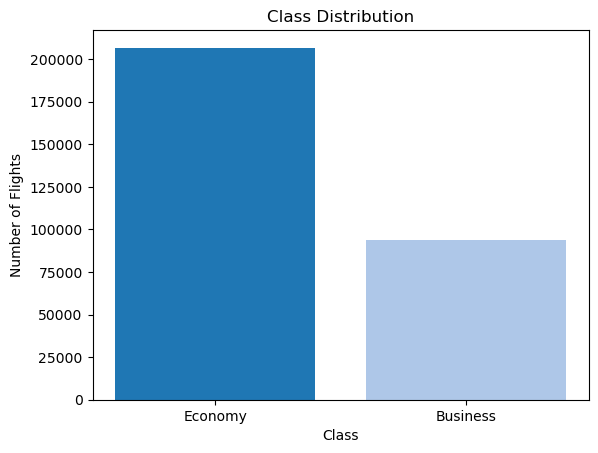

In [10]:
'''
To visualize the distribution of flight classes in the dataset,
so you can quickly see which class type occurs more frequently and by how much
'''

counts = df['class'].value_counts()   # Counts how many rows per class 
plt.bar(counts.index, counts.values, color=plt.cm.tab20.colors[:len(counts)]) # Bar chart with categories on x-axis and their counts on y-axis.

plt.title("Class Distribution")
plt.xlabel('Class')
plt.ylabel('Number of Flights')
plt.show()

# No of flights from each source city

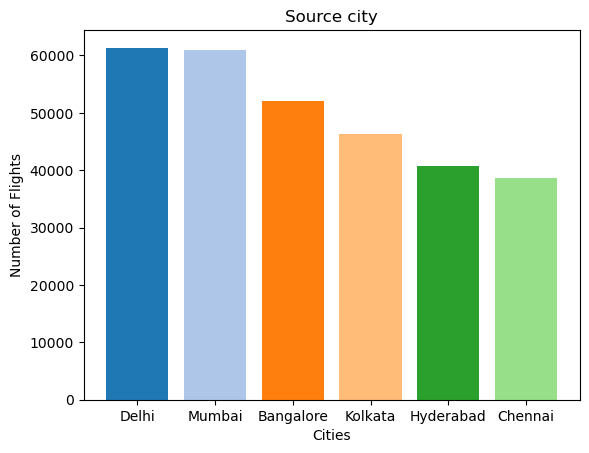

In [11]:
# show how many flights originate from each source city in the dataset, using a bar chart.


counts = df['source_city'].value_counts()
plt.bar(counts.index, counts.values, color=plt.cm.tab20.colors[:len(counts)])

plt.title("Source city")
plt.xlabel('Cities')
plt.ylabel('Number of Flights')
plt.show()

# No of flights per destination city

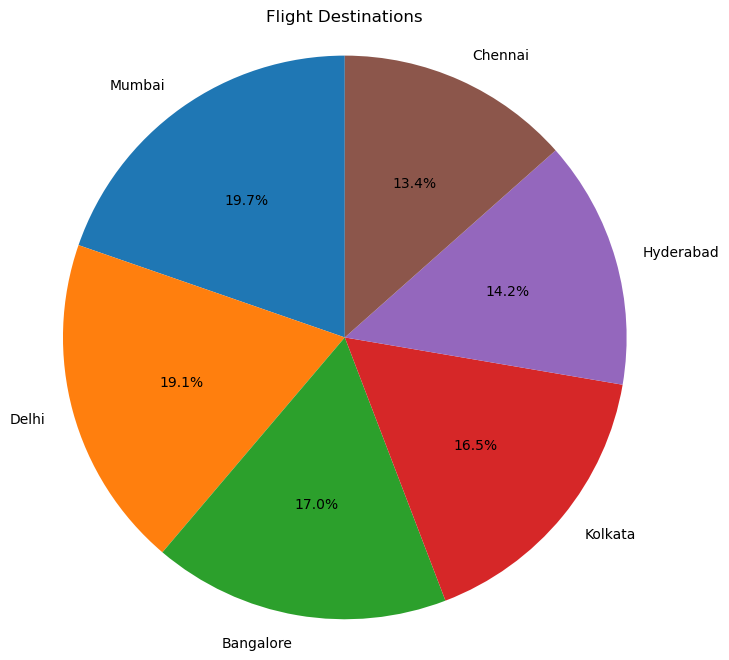

In [12]:
# Count flights per destination
counts = df['destination_city'].value_counts()

#pie chart
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Flight Destinations")
plt.axis('equal')
plt.show()

# Relation between days left until flight price

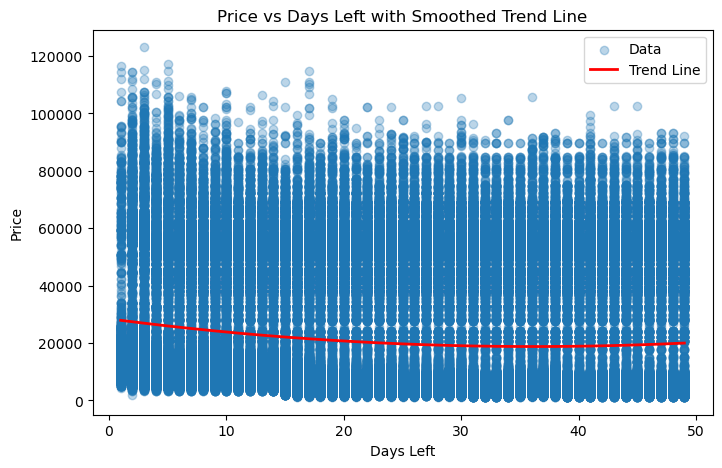

In [13]:
import numpy as np

# Sort data
df_sorted = df.sort_values(by='days_left')

# Fit a polynomial regression (degree=2 for curve, degree=1 for straight line)
z = np.polyfit(df_sorted['days_left'], df_sorted['price'], deg=2)
p = np.poly1d(z)

plt.figure(figsize=(8,5))
plt.scatter(df_sorted['days_left'], df_sorted['price'], alpha=0.3, label='Data')
plt.plot(df_sorted['days_left'], p(df_sorted['days_left']), color='red', linewidth=2, label='Trend Line')

plt.title("Price vs Days Left with Smoothed Trend Line")
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.legend()
plt.show()


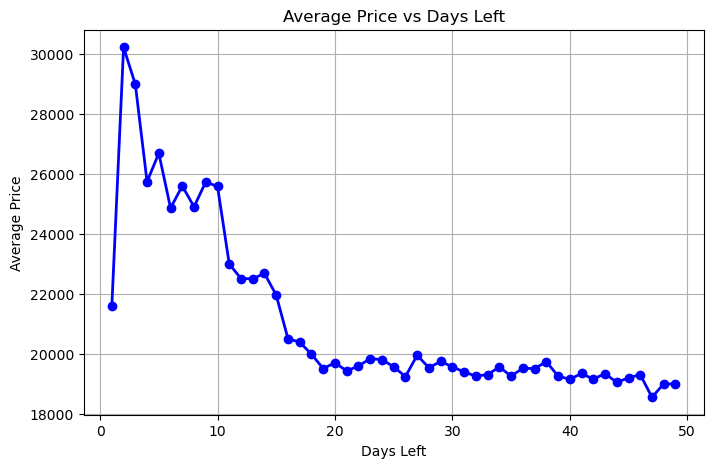

In [14]:
# Group by 'days_left' and calculate average price
avg_price = df.groupby('days_left')['price'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_price.index, avg_price.values, marker='o', color='blue', linewidth=2)
plt.title("Average Price vs Days Left")
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Average flight price for each airline

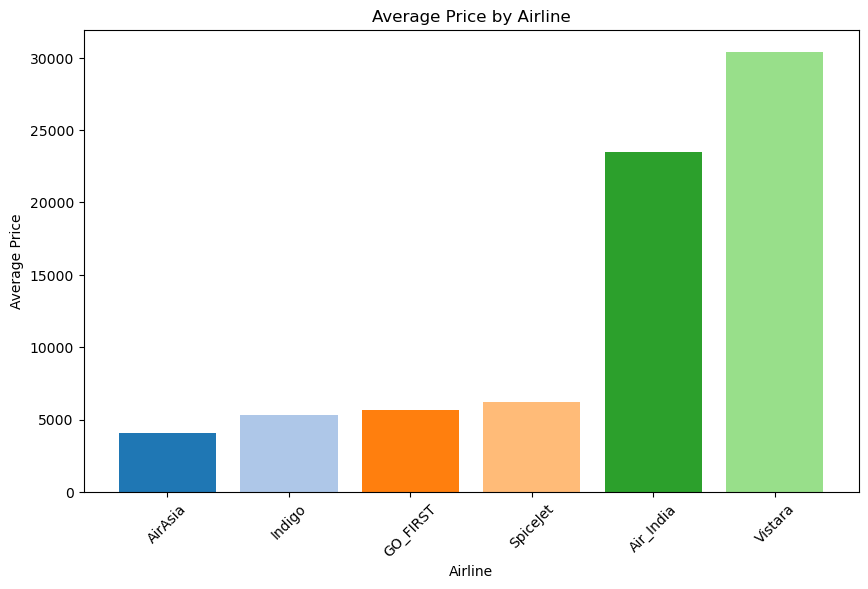

In [15]:
avg_price = df.groupby('airline')['price'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.bar(avg_price.index, avg_price.values, color=plt.cm.tab20.colors[:len(avg_price)])

plt.title("Average Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# No of economy and business class flights for each route

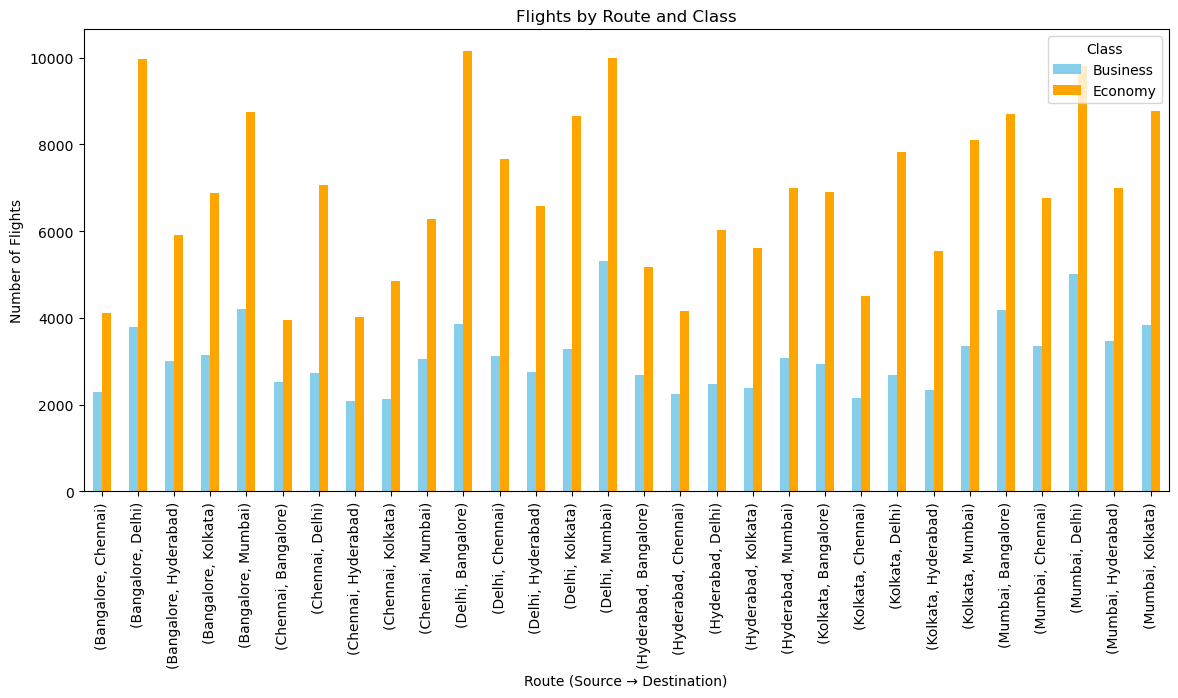

In [16]:

#Counts rows for each combination of source_city, destination_city, and class.
class_counts = df.groupby(['source_city', 'destination_city', 'class']).size().unstack(fill_value=0)

# unstack moves the class value from index into column headers
# fill_value = 0 Replaces any missing counts with 0


class_counts.plot(kind='bar', figsize=(14,6), color=['skyblue', 'orange'])

plt.title("Flights by Route and Class")
plt.xlabel("Route (Source → Destination)")
plt.ylabel("Number of Flights")
plt.xticks(rotation=90)
plt.legend(title="Class")
plt.show()

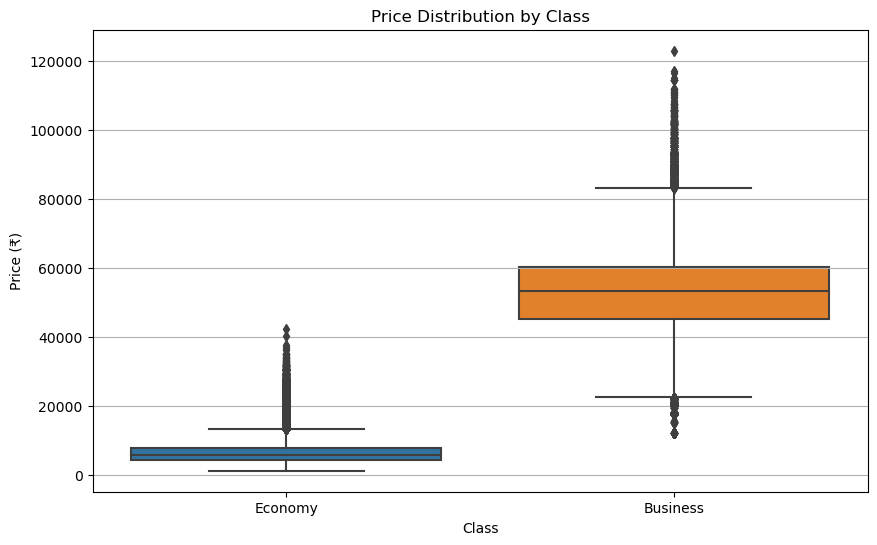

In [18]:
# Create box plots to compare price distribution between classes
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='price', data=df)
plt.title("Price Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Price (₹)")
plt.grid(True, axis='y')
plt.show()


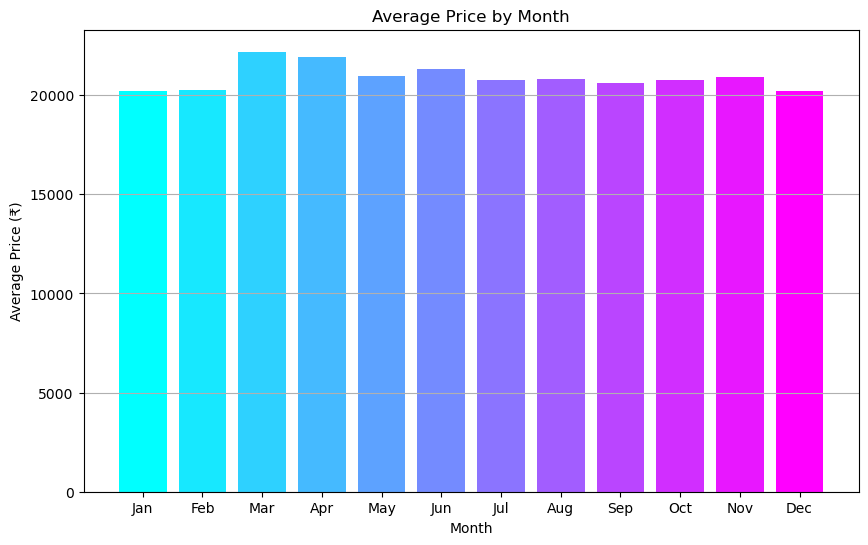

In [21]:
# Extract month from the dataset (assuming we have a date column)# For demonstration, we'll create a synthetic month column
df['month'] = (df['days_left'] % 12) + 1  
# Simulated month based on days_left# Analyze monthly price trends
monthly_avg = df.groupby('month')['price'].mean()
plt.figure(figsize=(10,6))
plt.bar(monthly_avg.index, monthly_avg.values, color=plt.cm.cool(np.linspace(0, 1, len(monthly_avg))))
plt.title("Average Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price (₹)")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')
plt.show()


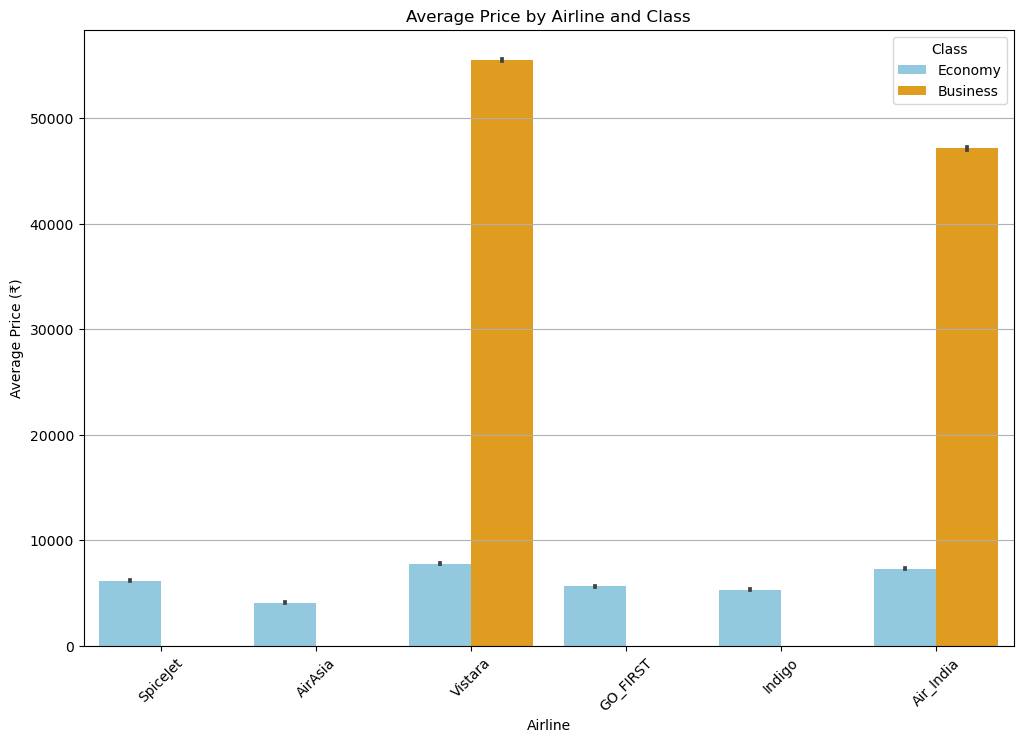

In [22]:
# Compare Business vs. Economy pricing across airlines
plt.figure(figsize=(12,8))
sns.barplot(x='airline', y='price', hue='class', data=df, palette=['skyblue', 'orange'])
plt.title("Average Price by Airline and Class")
plt.xlabel("Airline")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.legend(title="Class")
plt.grid(True, axis='y')
plt.show()


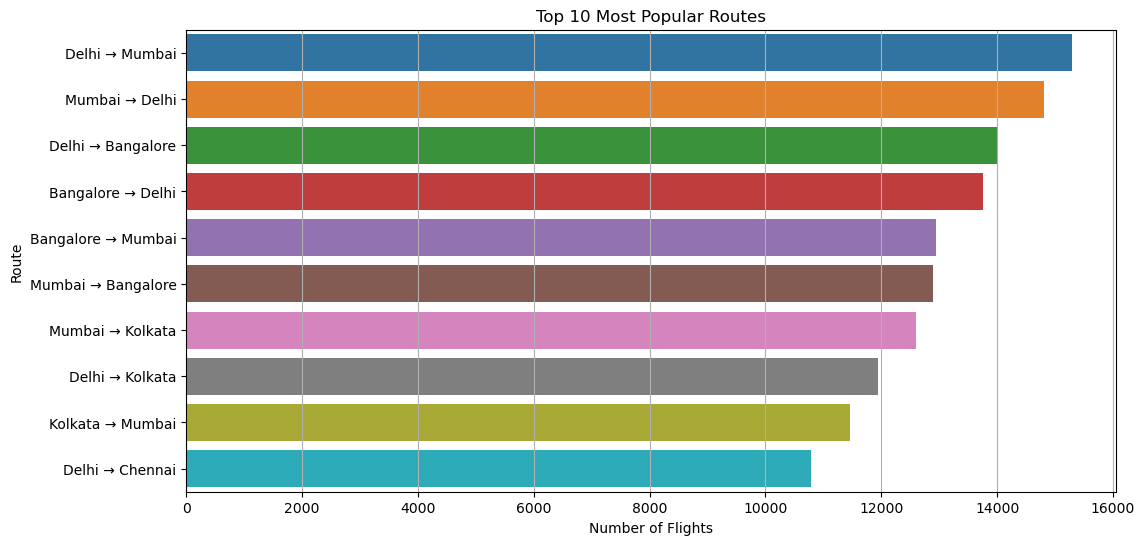

In [23]:
# Analyze the most popular routes
route_counts = df.groupby(['source_city', 'destination_city']).size().reset_index(name='count')
route_counts = route_counts.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='count', y=route_counts['source_city'] + ' → ' + route_counts['destination_city'], data=route_counts)
plt.title("Top 10 Most Popular Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.grid(True, axis='x')
plt.show()
